# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

# Assignment 2 - Solution

--- DATA ANALYSIS START --- 

Dataframe Dimension:  (165085, 4) 

Dataframe Head: 
             ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106 

Dataframe Tail: 
                  ID        Date Element  Data_Value
165080  USC00205822  2015-06-09    TMAX         256
165081  USC00205822  2009-10-06    TMAX         167
165082  USC00205050  2014-07-14    TMAX         283
165083  USC00200230  2006-11-29    TMIN         117
165084  USC00207312  2006-09-04    TMIN         111 

Number of Stations recording weather data each day:  24 

Station IDs: 
 ['USW00094889' 'USC00208972' 'USC00200032' 'USC00205563' 'USC00200230'
 'USW00014833' 'USC00207308' 'USC00203712' 'USW00004848' 'USC00200220'
 'USC00205822' 'USC00200842' 'USC00205450' 'USC00201250' 'USC00207320'
 'USC00200228'

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:37: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<IPython.core.display.Javascript object>


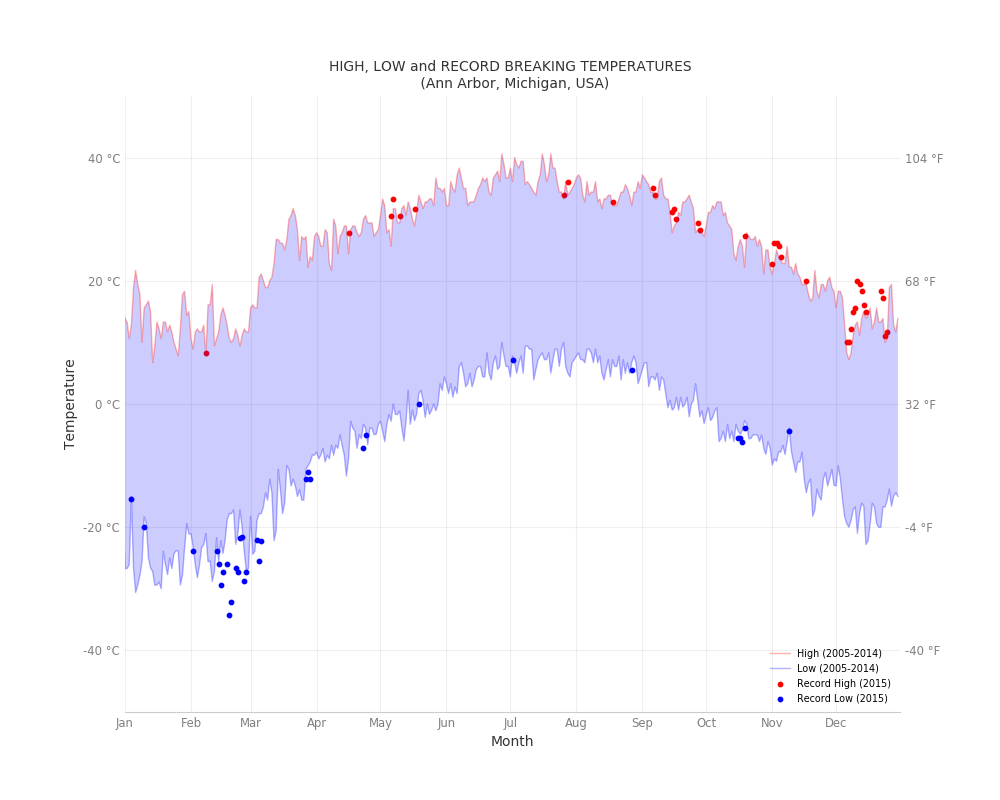

In [2]:
###   IMPORT LIBRARIES   ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###   LOAD WEATHER DATA   ###
# Weather data for "Ann Arbor, Michigan, United States"
data_source = {
               'filepath'   : 'data/C2A2_data/BinnedCsvs_d',
               'binsize'    : 400,
               'hashid'     : 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89',
               'fileformat' : 'csv'
              }

df = pd.read_csv('{}{}/{}.{}'.format(data_source['filepath'],
                                     data_source['binsize'],
                                     data_source['hashid'],
                                     data_source['fileformat']))


###   DATA ANALYSIS   ###
print('--- DATA ANALYSIS START ---', '\n')
print('Dataframe Dimension: ', df.shape, '\n')
print('Dataframe Head: \n', df.head(), '\n')
print('Dataframe Tail: \n', df.tail(), '\n')
print('Number of Stations recording weather data each day: ', len(df['ID'].unique()), '\n')
print('Station IDs: \n', df['ID'].unique(), '\n')
print('--- DATA ANALYSIS END ---', '\n')


###   DATA PREPARATIONS   ###
# Convert all the 10th of Celcius in Data_Values to °C
df['Data_Value'] = df['Data_Value'] / 10

# Sort the df by Station IDs & by Date
df.sort(['ID', 'Date'], ascending=True, inplace=True)

# Create Year & Month-Day columns
df['Year'], df['Month-Day'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))

# Drop the Leap days
df = df[df['Month-Day'] != '02-29']

# Get the Max & Min recorded tempratures, across all stations, for each day, for the years 2005-2014 & 2015
df0514_max = df[(df['Year'] != '2015') & (df['Element'] == 'TMAX')].groupby('Month-Day').aggregate({'Data_Value': np.max})
df0514_min = df[(df['Year'] != '2015') & (df['Element'] == 'TMIN')].groupby('Month-Day').aggregate({'Data_Value': np.min})
df15_max   = df[(df['Year'] == '2015') & (df['Element'] == 'TMAX')].groupby('Month-Day').aggregate({'Data_Value': np.max})
df15_min   = df[(df['Year'] == '2015') & (df['Element'] == 'TMIN')].groupby('Month-Day').aggregate({'Data_Value': np.min})

# Get the record breaking tempratures in 2015 compared to 2005-2014
df15_recbrk_max = np.where(df15_max['Data_Value'] > df0514_max['Data_Value'])
df15_recbrk_min = np.where(df15_min['Data_Value'] < df0514_min['Data_Value'])


###   DATA VISUALIZATION   ###
%matplotlib notebook

plt.figure(figsize= (10,8))
ax1 = plt.gca()    # Get the Primary axis
ax2 = ax1.twinx()  # Get the Secondary axis

# Draw the Line plots for the Min & Max tempratures for the years 2005 - 2014
ax2.plot(df0514_max.values, '-', color = 'r', linewidth = 1, label = 'High (2005-2014)', alpha = 0.3)
ax2.plot(df0514_min.values, '-', color = 'b', linewidth = 1, label = 'Low (2005-2014)', alpha = 0.3)

# Draw the Scatter plot for the record breaking tempratures for the year 2015
plt.scatter(df15_recbrk_max, df15_max.iloc[df15_recbrk_max], s = 10, c = 'r', label = 'Record High (2015)')
plt.scatter(df15_recbrk_min, df15_min.iloc[df15_recbrk_min], s = 10, c = 'b', label = 'Record Low (2015)')

# Shade between the Line plots for the Min and Max tempratures
ax2.fill_between(range(len(df0514_min)), df0514_min['Data_Value'], df0514_max['Data_Value'], 
                       facecolor = 'blue', alpha = 0.2)

# Set the Title, Legends & Labels for X-axis & Y-axis
ax1.grid(True, alpha = 0.2)
ax1.set_title('HIGH, LOW and RECORD BREAKING TEMPERATURES \n (Ann Arbor, Michigan, USA)', fontsize = 'medium', alpha = 0.8)
ax1.set_xlabel('Month', fontsize = 'medium', alpha = 0.8)
ax1.set_ylabel('Temperature', fontsize = 'medium', alpha = 0.8)
ax2.legend(loc = 4, labels = ['High (2005-2014)','Low (2005-2014)','Record High (2015)','Record Low (2015)'], 
           fontsize = 'x-small', frameon = False)

# Set the Limits, Ticks and Tick-Labels for the X-axis
xticks = ((pd.date_range('1/1/2015','31/12/2015', freq = 'M') - 1) + pd.Timedelta('1D')).strftime('%-j').astype(int)
xticklabels = pd.to_datetime(xticks, format = '%j').strftime('%b')
ax2.set_xlim(1,365)
ax2.set_xticks(xticks)
ax1.set_xticklabels(xticklabels, fontsize = 'small', alpha = 0.5)

# Set the Limits, Ticks and Tick-Labels for the Primary Y-axis
axlim = ax1.set_ylim(-50,50)
yticks = pd.Series([-40, -20, 0, 20, 40])
yticklabels_ax1 = pd.Series(yticks).astype(int).astype(str) + ' °C'
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels_ax1, fontsize = 'small', alpha = 0.5)

# Set the Limits, Ticks and Tick-Labels for the Secondary Y-axis, and Convert Celcius to Fahrenheit
ax2.set_ylim(axlim)
ax2.set_yticks(yticks)
yticklabels_ax2 = (yticks * (9/5) + 32).astype(int)
yticklabels_ax2 = pd.Series(yticklabels_ax2).astype(int).astype(str) + ' °F'
ax2.set_yticklabels(yticklabels_ax2, fontsize = 'small', alpha = 0.5) 

# Remove Ticks from both Primary and Secondary axes
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)

# Remove the Outer frame from all 4 sides
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)

# Set only the Bottom frame visible
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.2)

plt.show()
